# Filtering

In [1]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt

## Obtain low-pass filter coefficients for a difference equation (DE)

In [2]:
b,a = signal.butter(2, 1/4)
print("a = ", a)
print("b = ", b)

a =  [ 1.         -0.94280904  0.33333333]
b =  [0.09763107 0.19526215 0.09763107]


### Z-plane zero-pole plot of the transfer function $ H(z) = B(z) / A(z)$

In [3]:
def zplane(b, a):
    # First, retrieve the poles and zeros
    z,p,k = signal.tf2zpk(b,a)
    # Plot the unit circle 
    circle = plt.Circle((0,0),1,linestyle='--',fill=False)
    fig,ax = plt.subplots(figsize=(8,8))

    ax.add_artist(circle)
    plt.grid(axis='both',which='both')
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))

    # Plot zeros
    plt.plot(np.real(z),np.imag(z),'o',markersize=12,fillstyle='none')
    plt.plot(np.real(p),np.imag(p),'x',markersize=12)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Zero-pole plot')

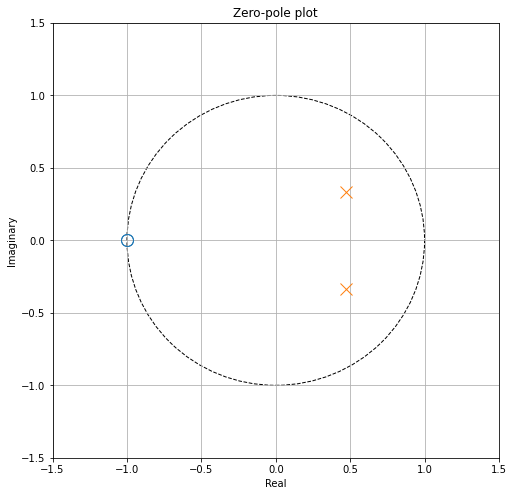

In [4]:
zplane(b, a)

### Impulse response $h[n]$ of the transfer function $H(z) = B(z) / A(z)$

In [5]:
def impz(b,a,N=50):
    n = np.arange(N)
    x = signal.unit_impulse(N,0)
    h = signal.lfilter(b,a,x)
    plt.stem(n,h)
    plt.title('Impulse response')
    plt.xlabel('n')
    plt.ylabel('h[n]')

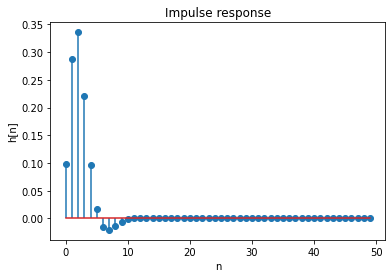

In [6]:
impz(b, a, 50)

### Frequency response $H_d(\omega)$ of the transfer function $H(z) = B(z) / A(z)$
This function is provided for readibility. In practice, use function scipy.signal.freqz

In [7]:
def freqresp(b, a, w):
    z = np.exp(1j * w)   # z is on the unit circle
    
    Bw = np.zeros_like(w, dtype=complex)
    for k in range(len(b)):
        Bw = Bw + b[k] * (z ** (-k))
        
        
    Aw = np.zeros_like(w, dtype=complex)
    for k in range(len(a)):
        Aw = Aw + a[k] * (z ** (-k))
    
    return Bw / Aw

In [8]:
w = np.linspace(-np.pi, np.pi, 100)   # $\omega$ values between -pi to +pi

Text(0.5, 1.0, '$|H_d(\\omega)|$')

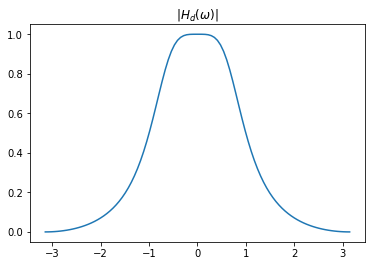

In [9]:
Hw = freqresp(b, a, w)
plt.plot(w, np.absolute(Hw))
plt.title('$|H_d(\omega)|$')

## Load a test signal

In [11]:
from scipy.io.wavfile import read
from IPython.display import Audio
fs, x = read('resources/handel.wav')

### Apply the DE specified by $b$ and $a$ to an input signal $x$ to get $y$

In [12]:
y = signal.lfilter(b, a, x)

## Check the filtering effect in the DTFT
This function is provided for readibility. In the future, we will use the DFT/FFT function numpy.fft

In [13]:
def DTFT(x, n0, w):
    '''
    DTFT    Compute the Discrete-Time Fourier Transform of a signal
        Input:
          x  : discrete-time signal in an array
          n0 : index of the signal corresponding to the sample x[0]
          w  : array of frequencies that we want to compute DTFT
               for example: w = np.linspace(-pi,pi,100)
        Output:
          X  : DTFT coefficients at the specified frequencies w
    '''
    X = np.zeros_like(w,dtype=complex) # data types: important in Python!!
    # For each frequency in w
    for k in range(len(w)):
        # Compute the DTFT sum over signal samples
        X[k] = 0
        for n in range(len(x)):
            X[k] = X[k] + x[n] * np.exp(-1j * w[k] * (n + n0))
            
    return X

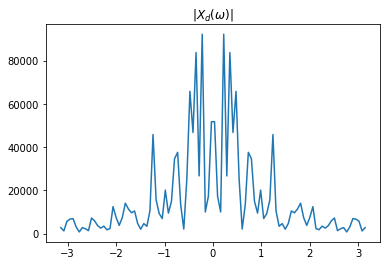

In [14]:
X = DTFT(x[0:100], 0, w) # Compute the DTFT of a 100-sample segnment of x
plt.plot(w, np.absolute(X))
plt.title('$|X_d(\omega)|$'); # Plot out the DTFT in magnitude

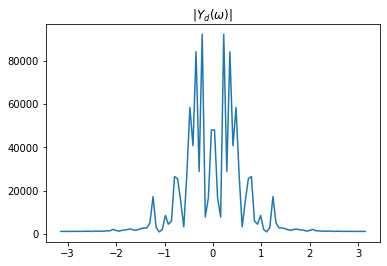

In [15]:
Y = DTFT(y[0:100], 0, w) # Compute the DTFT of a 100-sample segnment of y
plt.plot(w, np.absolute(Y))
plt.title('$|Y_d(\omega)|$'); # Plot out the DTFT in magnitude

## Try with a different filter

In [16]:
b2, a2 = signal.butter(2, 1/4, 'high')
print("a2 = ", a2)
print("b2 = ", b2)

a2 =  [ 1.         -0.94280904  0.33333333]
b2 =  [ 0.56903559 -1.13807119  0.56903559]


In [17]:
y2 = signal.lfilter(b2, a2, x)

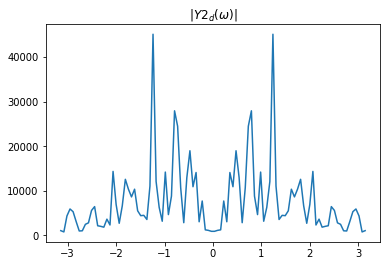

In [18]:
Y2 = DTFT(y2[0:100], 0, w) # Compute the DTFT of a 100-sample segnment of y2
plt.plot(w, np.absolute(Y2))
plt.title('$|Y2_d(\omega)|$'); # Plot out the DTFT in magnitude

## Compare sounds

In [ ]:
Audio(data=x, rate=fs)

In [ ]:
Audio(data=y, rate=fs)

In [ ]:
Audio(data=y2, rate=fs)